<a href="https://colab.research.google.com/github/Nehach73/DS3001_project_chd/blob/main/Project_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Coronary Heart Disease

**Group 2: Randa Ampah, Neha Channamraju, Rebekah Weaver, Faith Koobial, Gian Baez, Aysha Hussen**

In [7]:
## importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

### Cleaning data

In [9]:
# Loading training data
! git clone https://github.com/Nehach73/DS3001_project_chd.git
chd = pd.read_csv('DS3001_project_chd/fhs_train.csv')
chd_test = pd.read_csv('DS3001_project_chd/fhs_test.csv')

chd = chd.dropna()
chd = chd.drop(columns=['Unnamed: 0'])

chd_test = chd_test.dropna()
chd_test = chd_test.drop(columns=['Unnamed: 0'])

chd.head()

fatal: destination path 'DS3001_project_chd' already exists and is not an empty directory.


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
3,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0
6,0,54,1.0,0,0.0,0.0,0,1,0,237.0,171.5,105.5,34.25,91,104.0,0


In [10]:
chd.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2744.000000,2744.000000,2744.00000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000
mean,0.451531,49.587464,1.95481,0.488338,9.072522,0.030248,0.006195,0.322522,0.027697,236.606414,132.803754,83.175109,25.881440,75.786443,81.692055,0.154519
std,0.497736,8.527005,1.01149,0.499955,12.059226,0.171300,0.078481,0.467527,0.164133,44.055010,22.414487,12.015964,4.144616,12.007697,23.439117,0.361511
min,0.000000,32.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,51.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.00000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.250000,144.000000,90.000000,28.130000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.00000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [11]:
# Looking for the most explanatory variables
chd.corr()['TenYearCHD']

sex                0.100394
age                0.233327
education         -0.058663
currentSmoker      0.007957
cigsPerDay         0.050614
BPMeds             0.095222
prevalentStroke    0.043344
prevalentHyp       0.168785
diabetes           0.099882
totChol            0.113374
sysBP              0.213761
diaBP              0.140177
BMI                0.074476
heartRate          0.022805
glucose            0.119846
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


y_train = chd['TenYearCHD']
X_train = chd.drop(['TenYearCHD'], axis=1)
y_test = chd_test['TenYearCHD']
X_test = chd_test.drop(['TenYearCHD'], axis=1)


tree = DecisionTreeClassifier()
classifier = tree.fit(X_train, y_train)

y_hat = classifier.predict(X_test)

tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0])

print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y_train) )**2 )
rsq = 1 - SSE/TSS
print("R-squared = ", rsq)

Accuracy:  0.7789934354485777 

R-squared =  -0.7762814006801191


-0.8466291789248763


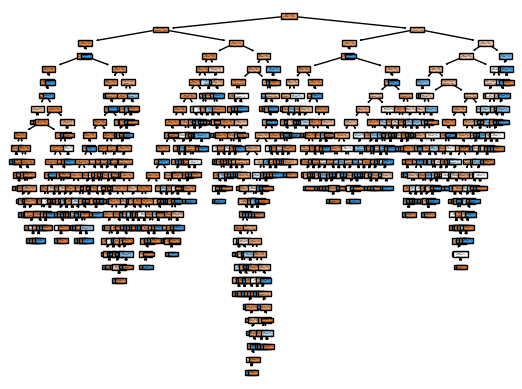

In [12]:
y_train = chd['TenYearCHD']
X_train = chd.drop(['TenYearCHD'], axis=1)
y_test = chd_test['TenYearCHD']
X_test = chd_test.drop(['TenYearCHD'], axis=1)

tree = DecisionTreeClassifier()
classifier = tree.fit(X_train, y_train)
y_hat = classifier.predict(X_test)

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y_train) )**2 )
rsq = 1 - SSE/TSS

print(rsq)
plot_tree(tree,filled=True,feature_names=tree.feature_names_in_ )
plt.show()

## Linear Regression

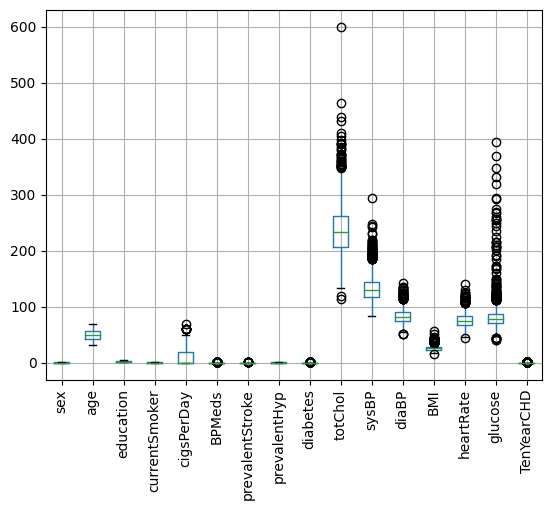

In [ ]:
chd.boxplot(rot=90)
plt.show()

In [ ]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Feature selection
features = ['age', 'prevalentHyp', 'sysBP']

# Split data into features and target variable
#chd2=chd.copy()

#X = chd2[features]
#y = chd2['TenYearCHD']

y_train = chd['TenYearCHD']
X_train = chd.drop(['TenYearCHD'], axis=1)
y_test = chd_test['TenYearCHD']
X_test = chd_test.drop(['TenYearCHD'], axis=1)

# Split data into training and testing sets

# Model build, fit, predict
model = LinearRegression()
lm = model.fit(X_train,y_train)
y_hat = lm.predict(X_test)

# R^2

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y_train) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

0.0924520563295107


In [ ]:
X_test.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,diaBP,BMI,heartRate,glucose,totChol_log,sysBP_log,diaBP_log,BMI_log,heartRate_log,glucose_log
1,0,51,3.0,0,0.0,0.0,0,0,0,264.0,...,83.0,26.68,60.0,74.0,5.293305,4.804021,4.406719,3.098289,4.442651,4.343805
4,1,58,2.0,1,20.0,0.0,0,0,0,207.0,...,80.0,23.55,78.0,78.0,5.308268,4.820282,4.521789,3.056827,4.317488,4.304065
5,1,53,1.0,0,0.0,0.0,0,1,0,202.0,...,90.0,25.82,85.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1,41,2.0,1,5.0,0.0,0,0,0,218.0,...,93.0,27.80,58.0,83.0,5.468060,5.144583,4.658711,3.533687,4.510860,4.644391
7,1,50,4.0,1,35.0,0.0,0,0,0,236.0,...,69.0,21.98,70.0,73.0,5.537334,4.927254,4.564348,3.392157,4.143135,4.234107


Summary


   For this project, we wanted to find the model that best predicted the likelihood of a person developing coronary heart disease (CHD). We examined two models: Decision Trees and Linear Regression, to see which one was a better predictor of developing CHD. In doing so, we examined variables that have the highest predictive rate of a person developing CHD and found that the three most correlated variables to ten-year CHD were age, systolic blood pressure, and prevalent hypertension. Following the implementation of a Decision Tree, we found that there was a negative relationship between our variables in its ability to predict the likelihood of a person developing coronary heart disease. The R squared was -.77 which translates to there being a negative 77 percent chance that our variables cause coronary heart disease. While the R squared was so low, the accuracy was about 78% which tells us our model was valid. On the contrary, when we examined this relationship in the context of a Linear Regression model, we found that there was an r squared of .092 which translates to there being a 9.2% chance that our variables cause coronary heart disease. When further examining the Linear Regression graph we can see that variables like sex, education, and current smoker have little to no relationship with a person that has coronary heart disease while the factors we examined earlier in age, systolic blood pressure, and prevalent hypertension are better predictors. On the graph, however, prevalent hypertension looks like it has a similar impact on current smokers and sex which would contradict the data we found at the beginning of the study. This graph also shows us that the variables with the highest mean are total cholesterol and systolic blood pressure while the graph with the largest outlier is also total cholesterol. This tells us that total cholesterol may be one of the more damning variables in predicting coronary heart disease.   


Data:

The key variables were sex, age, education and other health related factors such as whether the person was a current smoker, if so how many cigarettes they smoked per day, diabetes, their BMI, their cholesterol, etc. We used these variables in order to predict the likelihood of a person developing coronary health disease with a decision tree and a linear regression. In terms of cleaning the data, there was not much to clean besides an unnamed row, and it was through the boxplot that it was discovered that the unnamed variable was an outlier. The decision tree model did not have a high enough r^2 even though there was a high accuracy level, so we went to the linear regression model, which had a r^2 of .09, which is more accurate because it was closer to .1. There were not any challenges in picking the variables because there are a lot of factors that can contribute to the development of CHD, which is why we had a wide range of variables. A challenge we had when prepping the data for analysis is how to contextualize our findings. When we used the decision tree, there was a negative r^2 value, which indicated that there is no correlation between the variables chosen and them causing CHD. However, the linear regression model had a positive correlation, so we chose to go with that since there was a higher overall accuracy level on that model.


Results:

To analyze a decision tree, it is important to understand the most important predictor variables. The reason for the high accuracy but low r^2 is because the model did not capture the variability of the target variables well and there was a lot of variance with the key variable we chose to focus on. The box plot for the totChol, sysBP, and glucose had the most skewance. The glucose variable had the most outliers. This means that glucose levels do have a significant direct impact on causing CHD. The considerable amount of outliers that totChol and sysBP have is also indicative of the fact that they do have a direct impact on causing CHD. Variables like education, whether or not they are a current smoker, and heart rate were basically negligible. However, we specifically looked at the age, prevalentHyp, and sysBP variables and noticed, through the data, that these were key predictors for Coronary heart disease.

Conclusion:

Coronary heart disease (CHD), is a prevalent cardiovascular condition characterized by the narrowing or blockage of the coronary arteries, which supply oxygen-rich blood to the heart muscle. Many different factors can contribute to the development of CHD, including unhealthy diet, lack of physical activity, smoking, high blood pressure, high cholesterol levels, obesity, and diabetes. Some other risk factors that we can not control include age, family history, and genetic predisposition. For our project we explored different predictive models associated with coronary heart disease and we assess a few of the factors that may contribute to developing the disease.

We employed Decision Trees and Linear Regression to examine the variables most associated with CHD; we evaluated these models for their predictive capabilities. Age, systolic blood pressure, and prevalent hypertension were shown as key predictors. In the end both models provided valuable information on factors influencing CHD risk and they both had their strengths and weaknesses. The Decision Tree demonstrated good classification accuracy but  had a negative R squared value and lacked explanatory power. However, a negative R-squared value does not necessarily imply that the model is entirely ineffective, it does suggest that the explanatory power of the model is limited considering the entire variance in CHD. The Linear Regression model gave better information about relationships between variables and identified cholesterol as a strong predictor for coronary heart disease; however, the model had lower accuracy. The lower accuracy does not mean that the model is ineffective either. The model still provided us with a clearer understanding of the contributions our variables have on CHD. Even without a clear decision on which model is best we were still able to process and evaluate the models to our best ability and identify key variables that contributed to CHD.

There is also additional work that we can do outside the scope of the project to expand upon our work. We could enhance our methods with models that are more advanced than the ones we chose. Also, we could use deep learning approaches that would show more complex relationships within our data. Data could also be found from other sources to test our models on to see if we get similar results. We could also switch up our variables to capture underlying relationships with CHD better.
